In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dataset

In [15]:
dataset = pd.read_csv('coverage-dataset4.csv', sep=';')
dataset.head(5)

,Name,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,...,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,EdgeCoverage,PrimePathCoverage,Unnamed: 50
0,com.puppycrawl.tools.checkstyle.Checker.clearC...,4,8,0,5,1,2,3,1,2,...,1,1,0,0,1,0,0.05,"0,0000",NaN,NaN
1,com.puppycrawl.tools.checkstyle.DefaultConfigu...,1169,14,0,9,2,5,5,2,2,...,1,1,0,0,1,0,0.05,"1,0000",NaN,NaN
2,com.puppycrawl.tools.checkstyle.Checker.destroy(),20,14,0,14,1,9,0,4,3,...,1,1,0,0,1,0,0.08,"0,7500","0,0000",NaN
3,com.puppycrawl.tools.checkstyle.Checker.setCac...,6,10,0,5,2,3,5,4,1,...,1,1,0,0,1,0,0.08,"1,0000","1,0000",NaN
4,com.puppycrawl.tools.checkstyle.Checker.fireFi...,6,13,0,7,3,4,6,3,2,...,1,1,0,0,0,0,0.03,"1,0000","1,0000",NaN


In [547]:
dataset.describe()

,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,CountPathLog,...,Cyclomatic.1,CyclomaticModified.1,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,Unnamed: 50
count,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,...,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,4129.000000,0.0
mean,35.944781,21.262775,0.493582,13.503270,2.456043,8.978930,7.287721,5.026399,59.798014,0.394284,...,1.203439,1.202713,1.206345,1.002906,0.172439,0.001938,0.141439,0.001695,0.159591,NaN
std,138.005295,18.721994,1.703286,15.341148,3.187620,11.516179,5.398154,4.873102,587.112803,0.645517,...,0.716823,0.711432,0.723731,0.076194,0.665677,0.053882,0.382325,0.046662,0.173666,NaN
min,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.000000,12.000000,0.000000,5.000000,1.000000,3.000000,6.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,7.000000,16.000000,0.000000,9.000000,1.000000,5.000000,7.000000,4.000000,2.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.140000,NaN
75%,19.000000,23.000000,0.000000,16.000000,2.000000,11.000000,9.000000,6.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.270000,NaN
max,1169.000000,193.000000,17.000000,171.000000,41.000000,120.000000,98.000000,58.000000,6912.000000,4.000000,...,11.000000,11.000000,11.000000,3.000000,10.000000,2.000000,3.000000,2.000000,2.250000,NaN


## Pré-processamento

In [16]:
# Remove ultima coluna vazia
dataset = dataset.iloc[:,:-1]

# Remove NaN
dataset = dataset.dropna()

# Converte valores de cobertura em float
dataset.iloc[:,-1] = dataset.iloc[:,-1].apply(lambda ppc: float(ppc.replace(',', '.')))
dataset.iloc[:,-2] = dataset.iloc[:,-2].apply(lambda ec: float(ec.replace(',', '.')))

# Remove valores de cobertura zerados
dataset = dataset[dataset['EdgeCoverage'] > 0]
dataset = dataset[dataset['PrimePathCoverage'] > 0]

dataset.head(5)

,Name,CountInput,CountLine,CountLineBlank,CountLineCode,CountLineCodeDecl,CountLineCodeExe,CountLineComment,CountOutput,CountPath,...,CyclomaticModified.1,CyclomaticStrict.1,Essential.1,Knots.1,MaxEssentialKnots.1,MaxNesting.1,MinEssentialKnots.1,RatioCommentToCode.1,EdgeCoverage,PrimePathCoverage
3,com.puppycrawl.tools.checkstyle.Checker.setCac...,6,10,0,5,2,3,5,4,1,...,1,1,1,0,0,1,0,0.08,1.0000,1.0000
4,com.puppycrawl.tools.checkstyle.Checker.fireFi...,6,13,0,7,3,4,6,3,2,...,1,1,1,0,0,0,0,0.03,1.0000,1.0000
7,com.puppycrawl.tools.checkstyle.Checker.setCac...,6,10,0,5,2,3,5,4,1,...,1,1,1,0,0,0,0,0.04,1.0000,1.0000
43,com.puppycrawl.tools.checkstyle.DefaultConfigu...,8,7,0,7,1,4,0,4,2,...,1,1,1,0,0,0,0,0.00,0.3333,0.5000
54,com.puppycrawl.tools.checkstyle.api.LocalizedM...,57,28,1,16,6,11,11,5,3,...,1,1,1,0,0,0,0,0.00,0.5833,0.3333


## Características

In [549]:
def signature_to_project(signature):
    project = ''
    
    if 'com.puppycrawl.tools.checkstyle' in signature:
        project = 'Checkstyle'
    elif 'exp4j' in signature:
        project = 'Exp4j'
    elif 'biojava' in signature:
        project = 'Biojava'
    elif 'org.jfree' in signature:
        project = 'Jfreechart'
    elif 'com.urbanairship' in signature:
        project = 'Urban Airship Java Library'
    elif 'org.apache.commons.text' in signature:
        project = 'Apache Commons Text'
    elif 'dubbo' in signature:
        project = 'Apache Dubbo'
    elif 'org.apache.commons.lang3' in signature:
        project = 'Apache Commons Lang'
        
    return project

d2 = dataset
d2['Project'] = dataset['Name'].apply(signature_to_project)

<AxesSubplot:xlabel='Project', ylabel='count'>

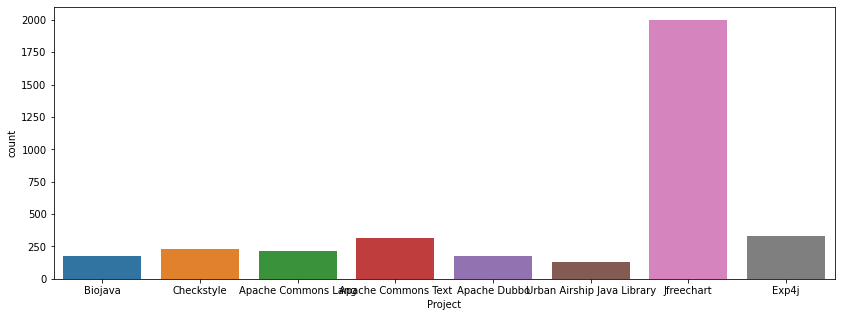

In [550]:
plt.figure(figsize=(14,5))
#sns.histplot(d2['Project'])

contrib_projetos = d2.groupby('Project')
contrib_projetos = contrib_projetos.count()

sns.countplot(x='Project', data=d2)

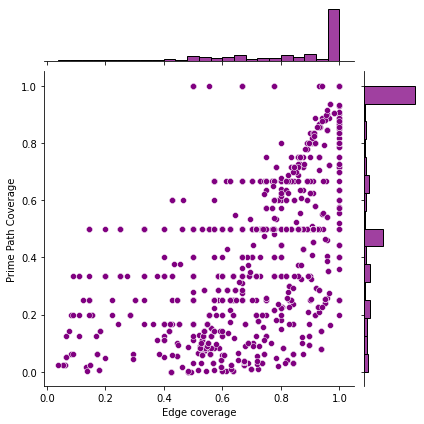

In [551]:
ax = sns.jointplot(x='EdgeCoverage', y='PrimePathCoverage', data=dataset, kind='scatter', color='purple')
#plt.xlabel('Edge coverage')
ax.set_axis_labels('Edge coverage', 'Prime Path Coverage')
plt.show(ax)

## Correlações

<AxesSubplot:>

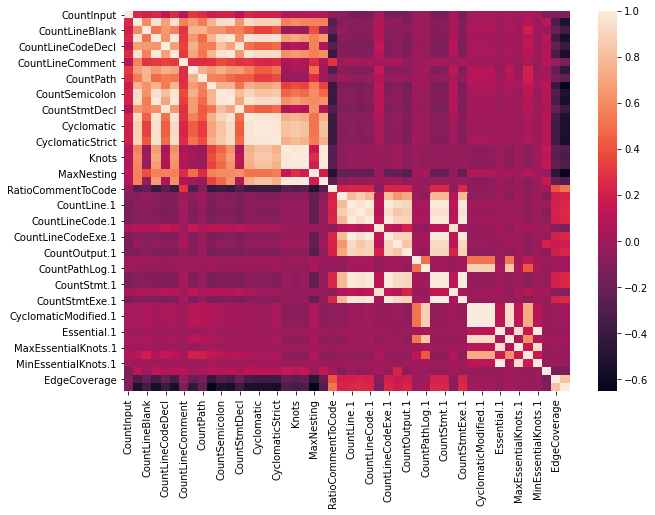

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr())

## Funções uteis

In [553]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4128
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  3572 non-null   object 
 1   CountInput            3572 non-null   int64  
 2   CountLine             3572 non-null   int64  
 3   CountLineBlank        3572 non-null   int64  
 4   CountLineCode         3572 non-null   int64  
 5   CountLineCodeDecl     3572 non-null   int64  
 6   CountLineCodeExe      3572 non-null   int64  
 7   CountLineComment      3572 non-null   int64  
 8   CountOutput           3572 non-null   int64  
 9   CountPath             3572 non-null   int64  
 10  CountPathLog          3572 non-null   int64  
 11  CountSemicolon        3572 non-null   int64  
 12  CountStmt             3572 non-null   int64  
 13  CountStmtDecl         3572 non-null   int64  
 14  CountStmtExe          3572 non-null   int64  
 15  Cyclomatic           

In [23]:
from sklearn.preprocessing import StandardScaler

k = 10
metricas_erro = [
    'r2', 'max_error', 'neg_mean_absolute_error',
    'neg_mean_squared_error', 'neg_root_mean_squared_error',
    'neg_mean_squared_log_error', 'neg_median_absolute_error'
]
previsores = [
    # Método testado
    'CountInput','CountLine','CountLineCode','CountLineCodeDecl',
    'CountLineCodeExe','CountLineComment','CountOutput','CountStmt',
    'CountStmtDecl','CountPath','CountPathLog','CountStmtExe',
    'Cyclomatic','CyclomaticModified','CyclomaticStrict','Essential',
    'Knots','MaxEssentialKnots','MaxNesting','MinEssentialKnots','EdgeCoverage',
    
    # Método de teste
    'CountInput.1','CountLine.1','CountLineBlank.1',
    'CountLineCode.1','CountLineCodeDecl.1','CountLineCodeExe.1',
    'CountOutput.1','CountStmt.1', 'CountStmtDecl.1',
    'CountStmtExe.1','Cyclomatic.1'
]

def escalonador(dados):
    scaler = StandardScaler()
    return scaler.fit_transform(dados)

def evaluate(previsores, classificador, d = dataset, k=10):
    ppc = d['PrimePathCoverage'].values
    previsores_content = d[previsores].values
    resultados = cross_validate(
            classificador, 
            previsores_content, 
            ppc, 
            cv=k, 
            scoring=metricas_erro, 
            return_estimator=True
    )
    resultados_escalonados = cross_validate(
            classificador, 
            escalonador(previsores_content), 
            ppc, 
            cv=k, 
            scoring=metricas_erro, 
            return_estimator=True
    )
    
    #print(ppc)
    #print(previsores_content)
    print(resultados)
    
    print('-----< SEM ESCALONAMENTO >-----')
    print('Mean Abs Error: ', abs(resultados['test_neg_mean_absolute_error'].mean()))
    print('Mean Sqr Error: ', abs(resultados['test_neg_mean_squared_error'].mean()))
    print('Mean Sqr Log Error: ', abs(resultados['test_neg_mean_squared_log_error'].mean()))
    print('Mean Median Error: ', abs(resultados['test_neg_median_absolute_error'].mean()))
    print('R2 Score: ', abs(resultados['test_r2'].mean()))
    print('-----< COM ESCALONAMENTO >-----')
    print('Mean Abs Error: ', abs(resultados_escalonados['test_neg_mean_absolute_error'].mean()))
    print('Mean Sqr Error: ', abs(resultados_escalonados['test_neg_mean_squared_error'].mean()))
    print('Mean Sqr Log Error: ', abs(resultados_escalonados['test_neg_mean_squared_log_error'].mean()))
    print('Mean Median Error: ', abs(resultados_escalonados['test_neg_median_absolute_error'].mean()))
    print('R2 Score: ', abs(resultados_escalonados['test_r2'].mean()))


def evaluate_metrics(classificador, d = dataset):
    ppc = d['PrimePathCoverage'].values
    importance_dataset = pd.DataFrame(
            [0]*len(previsores),
            index=previsores,
            columns=['importance']
    )
    previsores_content = d[previsores].values
    resultados = cross_validate(
            classificador, 
            previsores_content, 
            ppc, 
            cv=k, 
            scoring=metricas_erro,
            return_estimator=True
    )
    resultados_escalonados = cross_validate(
            classificador, 
            escalonador(previsores_content), 
            ppc, 
            cv=k, 
            scoring=metricas_erro,
            return_estimator=True
    )
    
    print('-----< SEM ESCALONAMENTO >-----')
    #print(resultados)
    for idx,estimator in enumerate(resultados['estimator']):
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                           index=previsores,
                                           columns=['importance'])
        importance_dataset += feature_importances
 
    #print(importance_dataset) 
    importance_dataset['mean'] = importance_dataset['importance'] / k
    plt.figure(figsize=(10,9))
    plt.title("Feature importance - Random forest - K = 10 - Mean")
    plt.barh(previsores, importance_dataset['mean'].values)
    plt.show()
    
    importance_dataset = pd.DataFrame(
            [0]*len(previsores),
            index=previsores,
            columns=['importance']
    )
    print('\n')
    
    print('-----< COM ESCALONAMENTO >-----')
    for idx,estimator in enumerate(resultados_escalonados['estimator']):
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                           index=previsores,
                                           columns=['importance'])
        importance_dataset += feature_importances

    importance_dataset['mean'] = importance_dataset['importance'] / k
    print(importance_dataset)
    plt.figure(figsize=(10,9))
    plt.title("Feature importance - Random forest - K = 10 - Mean")
    plt.barh(previsores, importance_dataset['mean'].values)
    plt.show()

## Random forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
classificador = RandomForestRegressor()

-----< SEM ESCALONAMENTO >-----


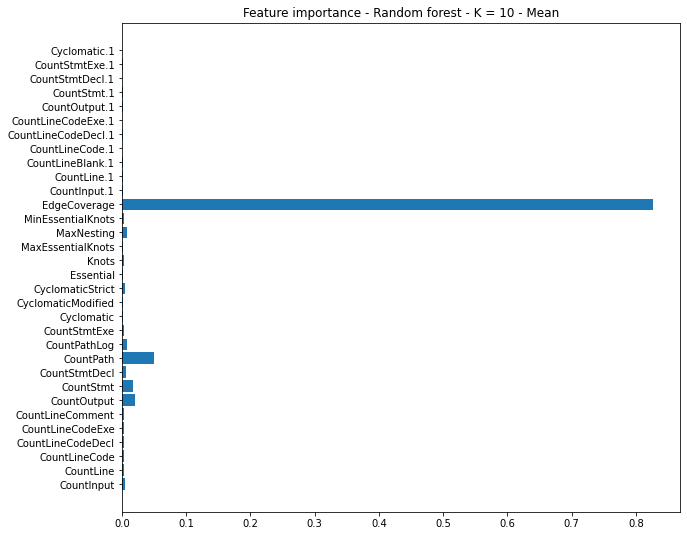



-----< COM ESCALONAMENTO >-----
                     importance      mean
CountInput             0.052890  0.005289
CountLine              0.032874  0.003287
CountLineCode          0.038438  0.003844
CountLineCodeDecl      0.038732  0.003873
CountLineCodeExe       0.029332  0.002933
CountLineComment       0.036719  0.003672
CountOutput            0.204182  0.020418
CountStmt              0.178681  0.017868
CountStmtDecl          0.066781  0.006678
CountPath              0.512167  0.051217
CountPathLog           0.080444  0.008044
CountStmtExe           0.035415  0.003542
Cyclomatic             0.025331  0.002533
CyclomaticModified     0.024415  0.002442
CyclomaticStrict       0.050850  0.005085
Essential              0.024767  0.002477
Knots                  0.029945  0.002995
MaxEssentialKnots      0.025042  0.002504
MaxNesting             0.080788  0.008079
MinEssentialKnots      0.027377  0.002738
EdgeCoverage           8.269296  0.826930
CountInput.1           0.017887  0.001789


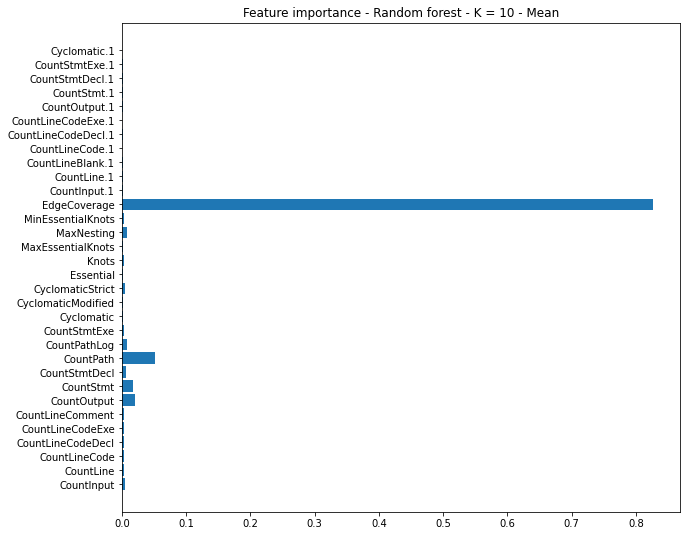

In [555]:
evaluate_metrics(RandomForestRegressor())

In [580]:
evaluate([
    'CountInput','CountLine','CountLineBlank','CountLineCode','CountLineCodeDecl','CountLineCodeExe',
    'CountLineComment','CountOutput','CountStmt','CountStmtDecl',
    'CountStmtExe','Cyclomatic','CyclomaticModified','CyclomaticStrict','Essential','Knots','MaxEssentialKnots',
    'MaxNesting','MinEssentialKnots',
    
    'CountInput.1','CountLine.1','CountLineBlank.1','CountLineCode.1','CountLineCodeDecl.1','CountLineCodeExe.1',
    'CountLineComment.1','CountOutput.1','CountPath.1','CountPathLog.1','CountStmt.1',
    'CountStmtDecl.1','CountStmtExe.1'
], RandomForestRegressor())

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.11247317124950354
Mean Sqr Error:  0.033358098296541315
Mean Sqr Log Error:  0.013861001778093698
Mean Median Error:  0.06722750000000015
R2 Score:  0.6555128538215791
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.11318409345546683
Mean Sqr Error:  0.033602410759486445
Mean Sqr Log Error:  0.013918087179914848
Mean Median Error:  0.07092830857142858
R2 Score:  0.6497333648794167


In [557]:
evaluate([
    'Cyclomatic', 
    'CyclomaticModified',
    'CountOutput',
    'Essential',
    'CountLine',
    'EdgeCoverage'
], RandomForestRegressor())

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.05240033258986978
Mean Sqr Error:  0.011624407507173138
Mean Sqr Log Error:  0.005314411530229124
Mean Median Error:  0.01169718666666673
R2 Score:  0.8831372597783451
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.05307768373582419
Mean Sqr Error:  0.011871232193262922
Mean Sqr Log Error:  0.005389899969189953
Mean Median Error:  0.013581072986490647
R2 Score:  0.8809206735166757


In [558]:
evaluate([
    'CountInput','CountLine','CountOutput','CountPath','CountStmt','CountStmtDecl','Knots',
    'MaxNesting','MinEssentialKnots',
    
    'CountInput.1','CountLine.1','CountLineCodeDecl.1','CountOutput.1','CountStmtDecl.1','CountStmtExe.1'
], RandomForestRegressor())

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.11178419515104618
Mean Sqr Error:  0.03288524104237983
Mean Sqr Log Error:  0.013646900972833656
Mean Median Error:  0.06455381785714283
R2 Score:  0.6599418089892822
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.11086564285238021
Mean Sqr Error:  0.03250588270678836
Mean Sqr Log Error:  0.01345313287000772
Mean Median Error:  0.0648730925396824
R2 Score:  0.6657059529992835


In [559]:
evaluate([
    'MaxNesting', 
    'CountPath', 
    'CountStmtExe', 
    'CountInput', 
    'CountOutput',
    'CountStmtExe.1'
], RandomForestRegressor())

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.11401748997818625
Mean Sqr Error:  0.035784104509984926
Mean Sqr Log Error:  0.014652926568072041
Mean Median Error:  0.060333144901209904
R2 Score:  0.6255424798239899
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.11364261182929289
Mean Sqr Error:  0.03551333573257429
Mean Sqr Log Error:  0.01452873573395489
Mean Median Error:  0.061253137074183964
R2 Score:  0.628778838512374


In [12]:
evaluate([
    'Cyclomatic', 
    'CyclomaticModified', 
    'CyclomaticStrict', 
    'CountInput', 
    'CountOutput',
    'EdgeCoverage',
    'CountStmtExe.1'
], RandomForestRegressor())

[1.     1.     1.     ... 0.5    1.     0.8571]
[[ 1.      1.      1.     ...  4.      1.     12.    ]
 [ 2.      2.      2.     ...  3.      1.     23.    ]
 [ 1.      1.      1.     ...  4.      1.     11.    ]
 ...
 [ 2.      2.      2.     ...  5.      0.8333  9.    ]
 [ 1.      1.      1.     ...  4.      1.     10.    ]
 [ 3.      3.      3.     ...  6.      1.     10.    ]]
{'fit_time': array([0.36379862, 0.37389994, 0.3585248 , 0.37058544, 0.36278391,
       0.36332798, 0.35545611, 0.36303282, 0.3572619 , 0.36975241]), 'score_time': array([0.01070619, 0.01300907, 0.010144  , 0.00896478, 0.00936985,
       0.00797272, 0.00897121, 0.00999594, 0.00897098, 0.00897074]), 'estimator': [RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()], 'test_r2': array([0.75412954, 0.8581296 , 0.78582456

## Removendo complexidades pequenas

<AxesSubplot:ylabel='Count'>

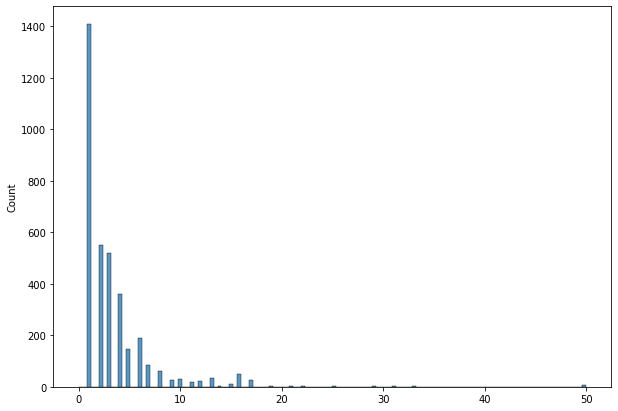

In [561]:
x = dataset['Cyclomatic'].values
plt.figure(figsize=(10,7))
sns.histplot(x)

Dataset size:  1844
-----< SEM ESCALONAMENTO >-----


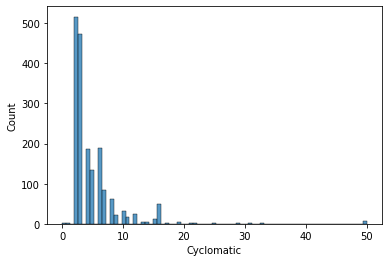

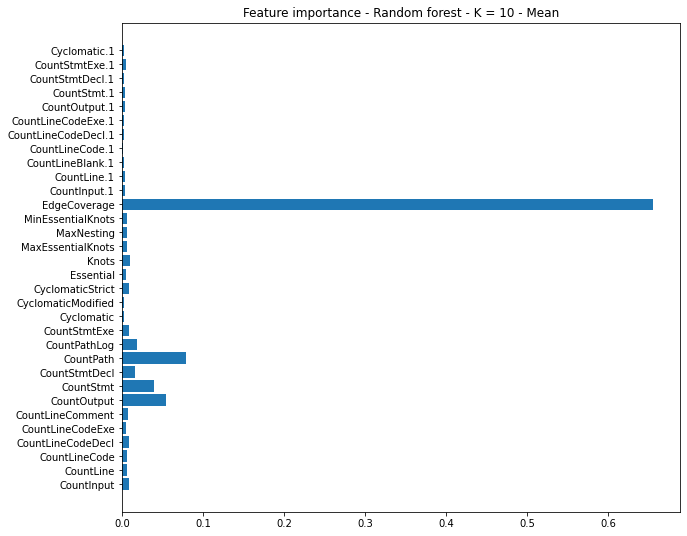



-----< COM ESCALONAMENTO >-----
                     importance      mean
CountInput             0.084438  0.008444
CountLine              0.063803  0.006380
CountLineCode          0.068115  0.006811
CountLineCodeDecl      0.089531  0.008953
CountLineCodeExe       0.054040  0.005404
CountLineComment       0.076119  0.007612
CountOutput            0.549066  0.054907
CountStmt              0.388225  0.038822
CountStmtDecl          0.165106  0.016511
CountPath              0.806221  0.080622
CountPathLog           0.193555  0.019355
CountStmtExe           0.090677  0.009068
Cyclomatic             0.024542  0.002454
CyclomaticModified     0.023662  0.002366
CyclomaticStrict       0.086612  0.008661
Essential              0.056005  0.005601
Knots                  0.089959  0.008996
MaxEssentialKnots      0.062350  0.006235
MaxNesting             0.071784  0.007178
MinEssentialKnots      0.065674  0.006567
EdgeCoverage           6.545511  0.654551
CountInput.1           0.034548  0.003455


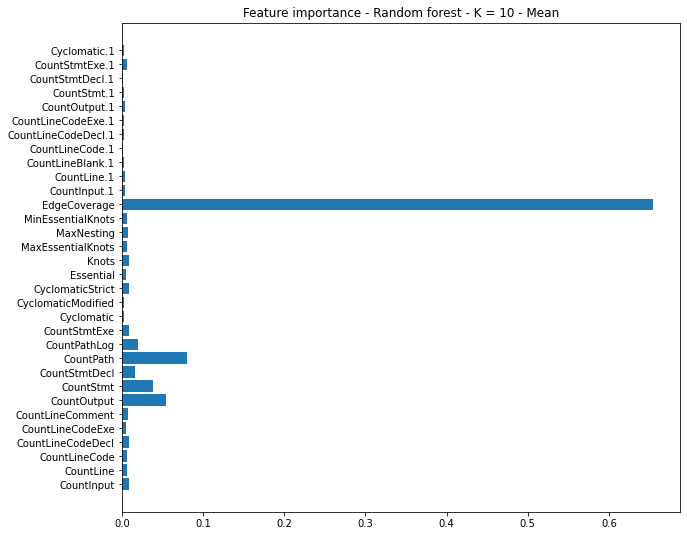

Média complexidade dataset:  3.379850016302576
Média complexidade dataset balanceado:  4.95824295010846


In [19]:
from imblearn.under_sampling import RandomUnderSampler

# usa técnica under-sampling
def under_sampling(d, seed = 0):
    ppc = d['PrimePathCoverage'].values
    rus = RandomUnderSampler(random_state=seed, sampling_strategy='majority')
    X_res, y_res = rus.fit_resample(d['Name'].values.reshape(-1,1), d['Cyclomatic'].values)
    d['Selected'] = d['Name'].apply(lambda name: name in X_res)
    dataset_filtered = d[d['Selected']]
    dataset_filtered = dataset_filtered.drop('Selected', axis=1)
    d = d.drop('Selected', axis=1)
    
    return dataset_filtered

dataset_filtered = under_sampling(dataset, 0)
print('Dataset size: ', dataset_filtered.shape[0])
sns.histplot(dataset_filtered['Cyclomatic'])

evaluate_metrics(RandomForestRegressor(), dataset_filtered)

print('Média complexidade dataset: ', dataset['Cyclomatic'].mean())
print('Média complexidade dataset balanceado: ', dataset_filtered['Cyclomatic'].mean())

In [22]:
from sklearn.neural_network import MLPRegressor
evaluate([
    'CountOutput',
    'EdgeCoverage',
    'CountPath',
    'CountStmt'
], MLPRegressor(), dataset_filtered)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueError("Mean Squared 

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueError("Mean Squared 

[1.     0.5    0.3333 ... 1.     0.5    0.8571]
[[ 3.      1.      2.      6.    ]
 [ 4.      0.3333  2.      4.    ]
 [ 5.      0.5833  3.     11.    ]
 ...
 [ 4.      1.      2.      4.    ]
 [ 5.      0.8333  2.      7.    ]
 [ 6.      1.      3.     10.    ]]
{'fit_time': array([0.53458619, 0.63223171, 0.6370337 , 0.24723196, 0.32690239,
       0.44866371, 0.81091976, 0.99741936, 0.39079404, 0.33298922]), 'score_time': array([0.0010159 , 0.00186682, 0.00199866, 0.00201464, 0.00200176,
       0.00199175, 0.00201321, 0.00300169, 0.00198126, 0.00098872]), 'estimator': [MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor(), MLPRegressor()], 'test_r2': array([       nan, 0.51595858,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan]), 'test_max_error': array([        nan, -0.52425217,         nan,         nan,         nan,
               nan,      

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_regression.py", line 413, in mean_squared_log_error
    raise ValueError("Mean Squared 

In [11]:
evaluate([
    'CountOutput',
    'EdgeCoverage',
    'CountPath',
    'CountStmt'
], RandomForestRegressor(), dataset_filtered)

[1.     0.5    0.3333 ... 1.     0.5    0.8571]
[[ 3.      1.      2.      6.    ]
 [ 4.      0.3333  2.      4.    ]
 [ 5.      0.5833  3.     11.    ]
 ...
 [ 4.      1.      2.      4.    ]
 [ 5.      0.8333  2.      7.    ]
 [ 6.      1.      3.     10.    ]]
{'fit_time': array([0.2869854 , 0.27819014, 0.23323035, 0.22598696, 0.23708153,
       0.22586942, 0.2136929 , 0.23477602, 0.2190299 , 0.23972893]), 'score_time': array([0.01111984, 0.01097274, 0.00797319, 0.00804424, 0.00896645,
       0.00958252, 0.00865936, 0.00797272, 0.00828862, 0.00897813]), 'estimator': [RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()], 'test_r2': array([0.67723587, 0.66488852, 0.85758269, 0.71539229, 0.86340617,
       0.86826472, 0.76559012, 0.74586419, 0.69064603, 0.90734963]), 'test_max_error': array([

In [20]:
from sklearn.neural_network import MLPRegressor
evaluate([
    'CountOutput',
    'EdgeCoverage',
    'Knots',
    'CountStmtDecl',
    'CountLineCodeDecl'
], RandomForestRegressor(), dataset_filtered)

[1.     0.5    0.3333 ... 1.     0.5    0.8571]
[[3.     1.     0.     4.     3.    ]
 [4.     0.3333 0.     1.     1.    ]
 [5.     0.5833 1.     6.     6.    ]
 ...
 [4.     1.     0.     1.     1.    ]
 [5.     0.8333 0.     2.     2.    ]
 [6.     1.     1.     3.     2.    ]]
{'fit_time': array([0.28386784, 0.2486825 , 0.25883365, 0.24362826, 0.2409904 ,
       0.25519609, 0.24306202, 0.23874855, 0.23998952, 0.2600553 ]), 'score_time': array([0.00808454, 0.00898719, 0.00833559, 0.01034188, 0.00792933,
       0.0088408 , 0.00810885, 0.01372981, 0.00896788, 0.00797391]), 'estimator': [RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor(), RandomForestRegressor()], 'test_r2': array([0.66853954, 0.61737981, 0.80232659, 0.5653231 , 0.83678264,
       0.80224722, 0.72508042, 0.69717929, 0.71849529, 0.88213113]), 'test_m

In [565]:
evaluate([
    'CountOutput',
    'CountPath',
    'CountStmt'
], RandomForestRegressor(), dataset_filtered)

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.19572386715401718
Mean Sqr Error:  0.06343088747168828
Mean Sqr Log Error:  0.026842965072600655
Mean Median Error:  0.17433076168067121
R2 Score:  0.16503498736185906
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.19703190439000748
Mean Sqr Error:  0.06355839522284508
Mean Sqr Log Error:  0.026842733713068927
Mean Median Error:  0.1777049646178108
R2 Score:  0.16600840603100683


In [566]:
evaluate([
    'CountOutput',
    'Knots',
    'CountStmtDecl',
    'CountLineCodeDecl'
], RandomForestRegressor(), dataset_filtered)

-----< SEM ESCALONAMENTO >-----
Mean Abs Error:  0.22951314952182206
Mean Sqr Error:  0.08250144485895063
Mean Sqr Log Error:  0.036320304072723145
Mean Median Error:  0.20819737866030924
R2 Score:  0.2480859470637568
-----< COM ESCALONAMENTO >-----
Mean Abs Error:  0.22947720206005567
Mean Sqr Error:  0.08282211677708108
Mean Sqr Log Error:  0.03658327457393137
Mean Median Error:  0.2093183940186471
R2 Score:  0.2371098217756769


<AxesSubplot:xlabel='Project', ylabel='count'>

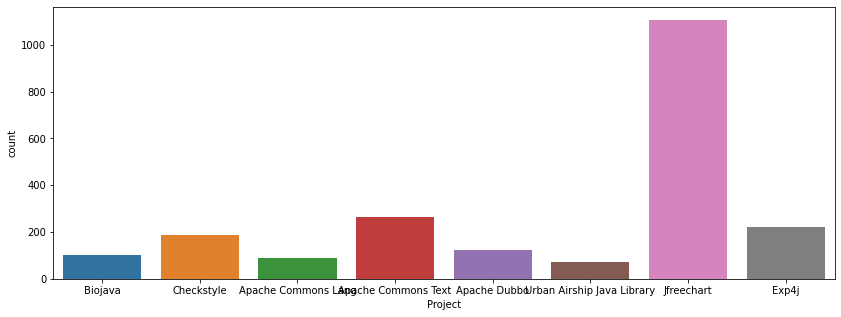

In [567]:
d2 = dataset_filtered
d2['Project'] = dataset_filtered['Name'].apply(signature_to_project)
plt.figure(figsize=(14,5))
#sns.histplot(d2['Project'])

contrib_projetos = d2.groupby('Project')
contrib_projetos = contrib_projetos.count()

sns.countplot(x='Project', data=d2)

-----< SEM ESCALONAMENTO >-----


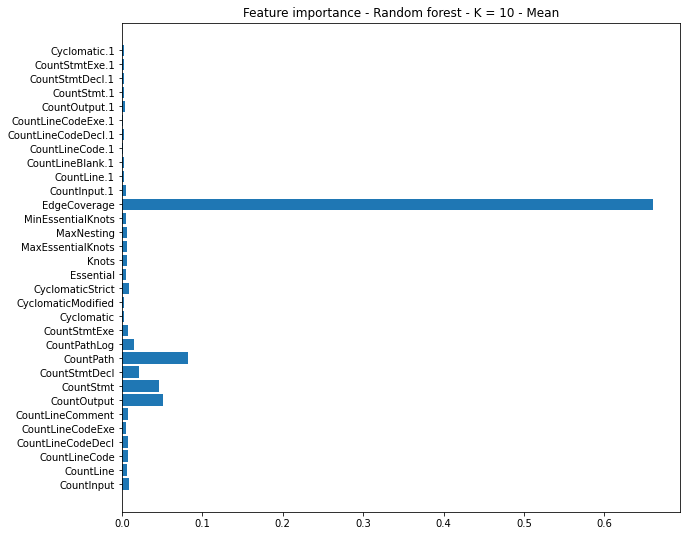



-----< COM ESCALONAMENTO >-----
                     importance      mean
CountInput             0.083753  0.008375
CountLine              0.065218  0.006522
CountLineCode          0.078920  0.007892
CountLineCodeDecl      0.077002  0.007700
CountLineCodeExe       0.053376  0.005338
CountLineComment       0.078679  0.007868
CountOutput            0.501258  0.050126
CountStmt              0.443053  0.044305
CountStmtDecl          0.214996  0.021500
CountPath              0.846285  0.084629
CountPathLog           0.152486  0.015249
CountStmtExe           0.066038  0.006604
Cyclomatic             0.028510  0.002851
CyclomaticModified     0.023982  0.002398
CyclomaticStrict       0.081327  0.008133
Essential              0.059391  0.005939
Knots                  0.065861  0.006586
MaxEssentialKnots      0.056511  0.005651
MaxNesting             0.059878  0.005988
MinEssentialKnots      0.060060  0.006006
EdgeCoverage           6.609974  0.660997
CountInput.1           0.047320  0.004732


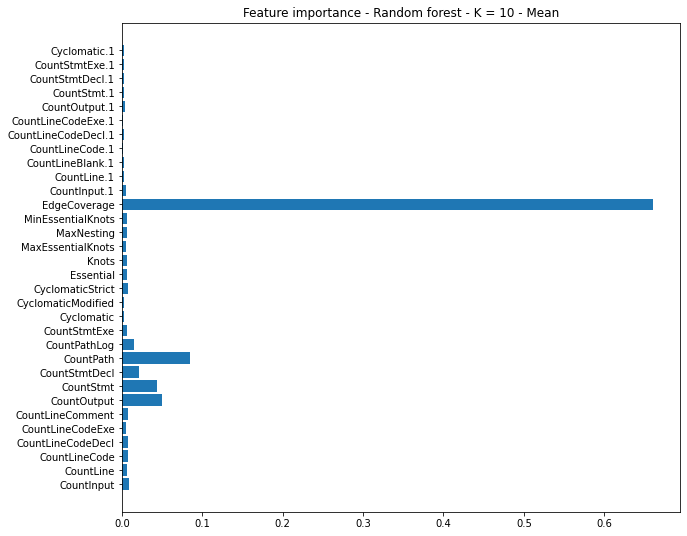

In [568]:
evaluate_metrics(RandomForestRegressor(), dataset_filtered)

In [578]:
pd.set_option('display.max_rows', 50)
outlier = dataset_filtered[dataset_filtered['PrimePathCoverage'] > dataset_filtered['EdgeCoverage']].shape[0]
total = dataset_filtered.shape[0]

print('PPC > EC: ', outlier / total * 100, '%', sep='')

PPC > EC: 4.568527918781726%
